In [ ]:
import pandas as pd
import numpy as np
import math as math
from matplotlib import pyplot as plt
from IPython.display import display, Math, HTML
import scipy.optimize as op
from pylab import *
from tabulate import tabulate

Propiedades

In [ ]:
COMP = ["Hidrogeno", "Acetona", "Alcohol Isopropilico", "Agua"]
PM=np.array([2.01589,58.08 ,60.1,18.01528])
A = np.array([2.94928, 4.21840, 8.1182, 5.11564])         # Constante A de Antoine
B = np.array([67.508, 1197.010, 1580.92, 1687.537])            # Constante B de Antoine
C = np.array([275.700, 228.060, 246.99, 219.62])              # Constante C de Antoine
F = np.array([34.78,6.37,0.22,19.51])

# **Fundamento Teórico**
La absorción es usada para separar mezclas de gases; remover impurezas, contaminantes o veneno de catalizadores, o la recuperación de sustancias valiosas.

Esto se logra por medio de transferencia de masa desde la fase gas a la líquida, cuando el proceso es inverso se le llamada desorción o agotamiento.

Esta operación unitaria es llevada a cabo en columna verticales de platos, las cuales permiten el contacto de fases en múltiples etapas a contracorriente.

![](https://www.filsonfilters.com/wp-content/uploads/2020/11/Figure-2-Absorption-tower.jpg)

Source: [Filson Filter](https://www.filsonfilters.com/absorption-tower)

Uno de los métodos por el que se analizan este tipo de equipos es a través de un Método Gráfico, el cual consiste en dibujar 2 líneas:

* *Línea de Equilibrio*: Ajusta datos y-x de equilibrio de fases entre el soluto y el absorbente. Para mezclas muy diluidas, el Ley de Henry puede describir correctamente este equilibrio.
* *Línea de Operación*: Representa las condiciones de absorción y-x deseadas durante el funcionamiento del equipo. Donde sus puntos terminales representan las condiciones en el fondo (extremo superior de la línea de operación) y el domo de la torre (extremo inferior de la línea de operación). Para torres de absorción, esta línea debe estar por encima de la línea de equilibrio; en el caso de desorción es contrario.

Para el cálculo del número de platos, deben de dibujarse escalones ente las líneas de operación y equilibrio. Esto se logra comenzando el dibujo desde la cima de la torre y terminando en el fondo de esta [1].

![](https://www.cheresources.com/invision/uploads/images/articles/packcol6.gif)

Source: [Cheresources](http://www.cheresources.com/content/articles/separation-technology/packed-column-design#google_vignette)




**Ecuaciones de balance** El balance se hace sobre la especie de interés (Acetona)



*   *y*: Vapor
*   *x*: Líquido
*   *E*: Corrientes de Entrada
*   *S*: Corrientes de Salida
*   *Inertey*: Flujo gaseoso inerte que transporte el soluto
*   *Inertex*: Flujo líquido inerte que transporta el soluto recuperado
*   *H*: Constante de Henry


\begin{equation}
  V_{E}\times y_{E}=N_{Ey}
\end{equation}

\begin{equation}
  V_{E}\times (1-y_{E})=N_{InerteyE}
\end{equation}

\begin{equation}
  N_{Ey}\times (\%_{Abs})=N_{xS}
\end{equation}

\begin{equation}
  N_{Ey}\times (\%_{NoAbs})=N_{yS}
\end{equation}

\begin{equation}
  N_{InerteyE}+N_{yS}=V_{S}
\end{equation}

\begin{equation}
  N_{InertexE}+N_{xS}=L_{S}
\end{equation}

\begin{equation}
  \frac {N_{yS}}{V_{S}}=y_{S}
\end{equation}

\begin{equation}
  \frac {N_{xS}}{L_{S}}=x_{S}
\end{equation}

**Línea de Operación**
\begin{equation}
  y=\frac{L_{S}}{V_{E}}x+y_{S}+\frac{L_{S}}{V_{E}}x_{E}
\end{equation}

**Línea de Equilibrio**
\begin{equation}
  P_{T}y=Hx
\end{equation}


**FUENTE**
[1] Seader S.D. , Henley E. , Roper K. (2011) *Separation Process Principles: Chemical and Biochemical Operations* 3erd edition,  John & Wiley Sons USA

# **VIDEO DEMOSTRATIVO DEL FUNCIONAMIENTO DE UN A COLUMNA DE ABSORCIÓN DE PLATOS**
Ejemplo del uso de aminas para la remoción de ácidos

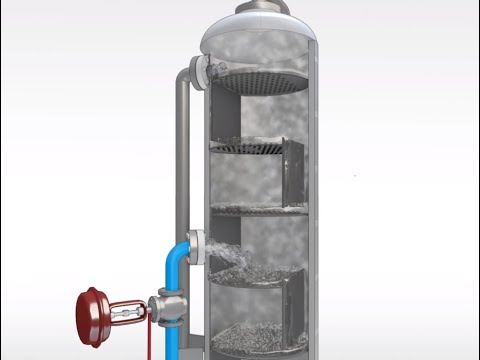

In [3]:
from IPython.display import YouTubeVideo
YouTubeVideo("qybIVRG20OA",560,315,start=0,end=108,rel=0)

## **Torre de Absorción**
El problema describe una situación del Proceso Turton, en el que se absorbe con agua la acetona de una mezcla acetona-hidrógeno, la cual sale de un separador de fase.

Las condiciones son:
* Entrada
 * *Acetona*: 1 %
   * Donde se absorbe el 90% de la acetona presente en el efluente.
 * *Vapor*: 7.6 kmol/h
 * *Líquido*: 20 kmol/h


- Entrada de acetona en la corriente de gas: 0.076. kgmol acetona/h
- Entrada de acetona en la corriente gaseosa: 7.524. kgmol aire/h
- Salida de acetona en la corriente gaseosa: 0.008. kgmol acetona/h
- Salida de acetona en la corriente líquida: 0.068. kgmol acetona/h
- Corriente de salida del gas: 7.532. kgmol aire + acetona/h
- Fracción mol de acetona en la salida del gas: 0.001009.
- Corriente de salida del líquido: 20.068. kgmol agua + acetona/h
- Fracción mol de acetona en la salida del líquido: 0.003408.

        Yeq             Yop      
     0.000000        0.001009 
     0.001110        0.002329 
     0.002220        0.003650 
     0.003330        0.004970 
     0.004440        0.006290 
     0.005550        0.007611 
     0.006660        0.008931 
     0.007770        0.010251 
     0.008880        0.011571 

Etapas de equilibrio, punto por punto
     Xplatos         Yplatos      
    0.0000000       0.0010091 
    0.0004545       0.0010091 
    0.0004545       0.0022093 
  

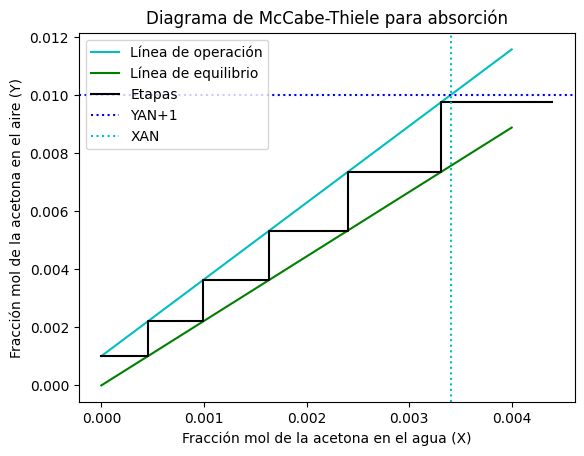

Pendiente de la recta de operación: 2.641.
Pendiente de la recta de equilibrio: 2.220.


In [ ]:
T = 318                      #Temperatura del proceso (K)
H = 2.22                      #Constante de Henry
NoAbs = 0.10                 #Porcentaje de acetona que no se absorbe
Abs = 0.90                    #Porcentaje de acetona que sí se absorbe
YAN1 = 0.01                  #Fracción mol de acetona en el de Entrada
XA0 = 0                      #Fracción mol de acetona en el agua de Entrada
VN1 = 7.6                     #Corriente de Entrada (kmol/h)
L0 = 20                      #Corriente de Entrada  (kgmol/h)

YAN1_E = YAN1*VN1
print ('- Entrada de acetona en la corriente de gas: %5.3f.' %YAN1_E, "kgmol acetona/h")
AiN1_E = (1-YAN1)*VN1
print ('- Entrada de acetona en la corriente gaseosa: %5.3f.' %AiN1_E, "kgmol aire/h")
YA_S = NoAbs*YAN1_E
print ('- Salida de acetona en la corriente gaseosa: %5.3f.' %YA_S, "kgmol acetona/h")
XAN_S = Abs*YAN1_E
print ('- Salida de acetona en la corriente líquida: %5.3f.' %XAN_S, "kgmol acetona/h")
V1_S = YA_S + AiN1_E
print ('- Corriente de salida del gas: %5.3f.' %V1_S, "kgmol aire + acetona/h")
YA1 = YA_S / V1_S
print ('- Fracción mol de acetona en la salida del gas: %5.6f.' %YA1)
LN = L0 + XAN_S
print ('- Corriente de salida del líquido: %5.3f.' %LN, "kgmol agua + acetona/h")
XAN = XAN_S / LN
print ('- Fracción mol de acetona en la salida del líquido: %5.6f.' %XAN)
print("")

x = np.linspace(0, 0.004, 9)      # 0.0050(1% H=2),   0.00359(1% H=2.8),   0.0250(5% H=2),   0.0180(5% H=2.8)    EJEMPLO DEL LIBRO 1% H=2.53 (0.004)
n = len(x)
Ye = np.zeros(n)
Yo = np.zeros(n)
mo = LN / VN1                       #Pendiente de la línea de operación
print('        Yeq             Yop      ')
for i in range (n):
    Ye[i] = H*x[i]                  #Ecuación de la recta de equilibrio (La ec. se simplifa ya que la presión de trabajo es 1 atm)
    Yo[i] = mo*x[i] + YA1           #Ecuación de la recta de operación (La ec. se simplifica ya que la concentración de soluto en el líquido de entrada es cero)
    print ('%13.6f %15.6f ' %(Ye[i],Yo[i]))

#Calculo analítico de las etapas de equilibrio necesarias para la absorción
YP = [YA1]
XP = [0]
i = 0
yp = 0
print ("")
print ("Etapas de equilibrio, punto por punto")
print('     Xplatos         Yplatos      ')
while yp < YAN1 : #Este ciclo permite asignar los valores de "X" y "Y" para los escalones que se construyen entre las líneas de operación y equilibrio
    xp = YP[i] / H # A partir de un valor inicial de "Y" se sustituye en la ecuación de equilibrio
    XP.append(xp)
    yp = mo*XP[i] + YA1 #La fracción en líquido asignada en la ecuación de equilibrio se sustituye en la línea de operación para dar un nuevo valor de "Y" para asignar cuando se reinicia el ciclo
    YP.append(yp)
    print ('%13.7f %15.7f ' % (XP[i],YP[i]))
    i += 1
print ("i =", i)

NE = i / 2
print ("Para saber las etapas de equilibrio analíticamente, se cuentan los puntos antes de que Y=YN1 y se dividen entre dos, en este caso el número de puntos es igual a i (i =",i,"), por lo tanto NoPuntos = ",i,". Si el i >",i,", los escalones de la gráfica pasarían la línea de LN+1 (línea punteada azul), de esta manera también se podría observar que el número de platos es mayor al necesario.")
print ("Por lo tanto el número de etapas de equilirbio es:", NE)

#EL while da un punto inecesario, SOLO PARA GRAFICAR se obtienen 2 nuevos vectores sin tomar en cuenta el último punto
XE = XP [0:i]
YO = YP [0:i]

#Diagrama McCabe-Thiele
plt.title('Diagrama de McCabe-Thiele para absorción')
plt.xlabel('Fracción mol de la acetona en el agua (X)')
plt.ylabel('Fracción mol de la acetona en el aire (Y)')
plt.plot(x, Yo, '-', color='c', label = 'Línea de operación')
plt.plot(x, Ye, '-', color='g', label = 'Línea de equilibrio')
plt.plot(XE, YO, '-', color='k', label = 'Etapas')
axhline(YAN1, color='b', ls="dotted", label = 'YAN+1')
axvline(XAN, color='c', ls="dotted", label = 'XAN')
plt.legend()
plt.show()
print ('Pendiente de la recta de operación: %5.3f.' %mo)
print ('Pendiente de la recta de equilibrio: %5.3f.' %H)